\begin{tabular}{|c|c|c|c|c|c|}
\hline
n & Min $cM_2$ & Je join & $k$ & Max $cM_2$ & $k$ \\
\hline
3 & 0 & Da & 2 & 6 & 1 \\
4 & 0 & - & - & 24 & 1 \\
5 & 0 & - & - & 72 & 2 \\
6 & 0 & - & - & 168 & 2 \\
7 & 0 & - & - & 324 & 3 \\
8 & 0 & - & - & 600 & 3 \\
\hline
\end{tabular}
Narišem graf z maksimalnim cM_2 za n=3:


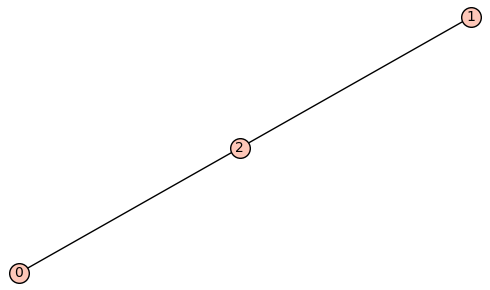

Narišem graf z minimalnim cM_2 za n=3:


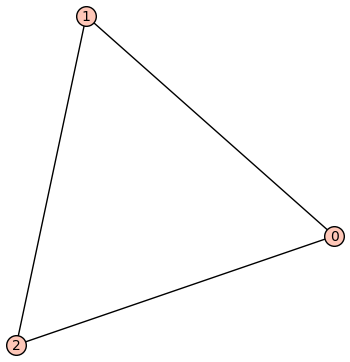

Narišem graf z maksimalnim cM_2 za n=4:


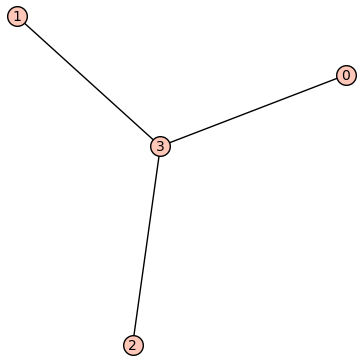

Narišem graf z minimalnim cM_2 za n=4:


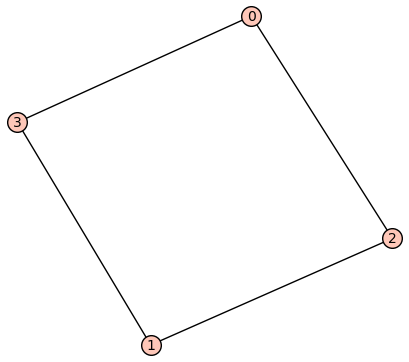

Narišem graf z maksimalnim cM_2 za n=5:


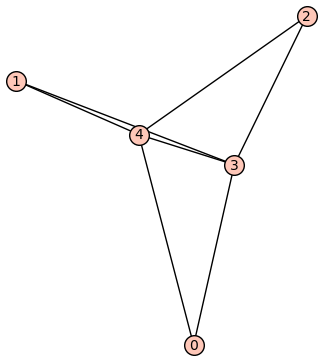

Narišem graf z minimalnim cM_2 za n=5:


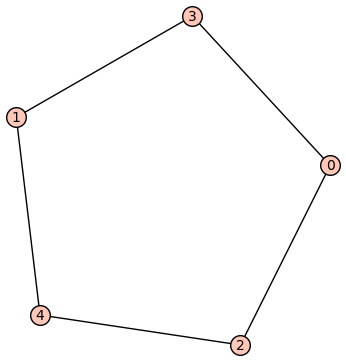

Narišem graf z maksimalnim cM_2 za n=6:

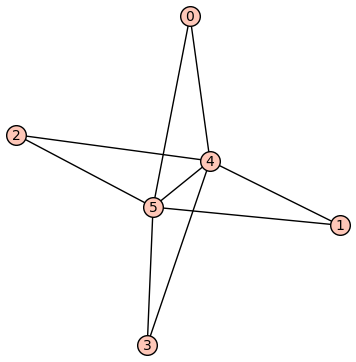

Narišem graf z minimalnim cM_2 za n=6:


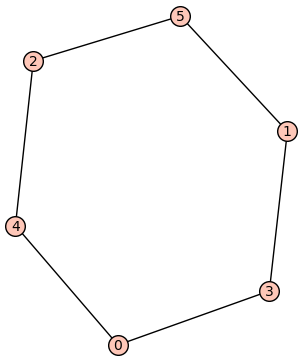

Narišem graf z maksimalnim cM_2 za n=7:


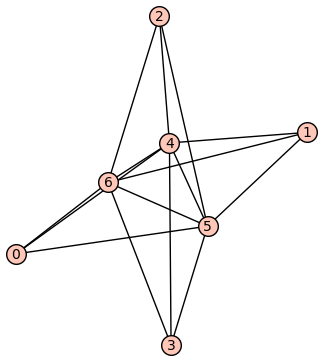

Narišem graf z minimalnim cM_2 za n=7:


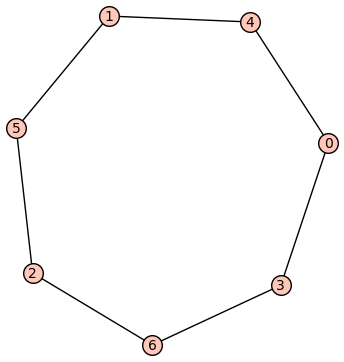

In [8]:
# Funkcija za izračun komplementarnega drugega Zagrebškega indeksa
def komplementarni_drugi_zagrebški_indeks(G):
    return sum(abs(G.degree(u)**2 - G.degree(v)**2) for u, v in G.edges(labels=False))

# Funkcija za generacijo grafa tipa K_k in izolirani_(n-k)
def generiraj_join_graf(n, k):
    Polni = graphs.CompleteGraph(k)
    Izolirani = Graph(n - k)
    Polni.relabel({i: i for i in range(k)}, inplace=True)
    Izolirani.relabel({i: i + k for i in range(n - k)}, inplace=True)
    G = Graph()
    G.add_vertices(range(n))
    G.add_edges(Polni.edges())
    for u in range(k):
        for v in range(k, n):
            G.add_edge(u, v)
    return G

# Preveri, ali je graf izomorfen join grafu tipa K_k in izolirani_(n-k)
def je_graf_join_polni_izolirani(G):
    n = G.order()
    for k in range(1, n):
        H = generiraj_join_graf(n, k)
        if G.is_isomorphic(H):
            return True, k
    return False, None

# Analiza minimuma/maksimuma 
def testiraj_grafe(n):
    rezultati = []
    for G in graphs.nauty_geng(f"-c {n}"):
        G = Graph(G)
        vrednost = komplementarni_drugi_zagrebški_indeks(G)
        je_join, k_val = je_graf_join_polni_izolirani(G)
        rezultati.append({
            "graf": G,
            "vrednost": vrednost,
            "je_join": je_join,
            "k": k_val
        })
    max_vrednost = max(r["vrednost"] for r in rezultati)
    min_vrednost = min(r["vrednost"] for r in rezultati)
    max_grafi = [r for r in rezultati if r["vrednost"] == max_vrednost]
    min_grafi = [r for r in rezultati if r["vrednost"] == min_vrednost]
    return rezultati, max_grafi, min_grafi

# LaTeX tabela
def latex_tabela(seznam_n):
    latex_izpis = ""
    latex_izpis += "\\begin{tabular}{|c|c|c|c|c|c|}\n"
    latex_izpis += "\\hline\n"
    latex_izpis += "n & Min $cM_2$ & Je join & $k$ & Max $cM_2$ & $k$ \\\\\n"
    latex_izpis += "\\hline\n"
    for n in seznam_n:
        _, max_grafi, min_grafi = testiraj_grafe(n)
        min_r = min_grafi[0] if min_grafi else None
        max_r = max_grafi[0] if max_grafi else None
        min_val = min_r['vrednost'] if min_r else "-"
        min_join = "Da" if min_r and min_r["je_join"] else "-"
        min_k = min_r['k'] if min_r and min_r['k'] is not None else "-"
        max_val = max_r['vrednost'] if max_r else "-"
        max_k = max_r['k'] if max_r and max_r['k'] is not None else "-"
        latex_izpis += f"{n} & {min_val} & {min_join} & {min_k} & {max_val} & {max_k} \\\\\n"
    latex_izpis += "\\hline\n"
    latex_izpis += "\\end{tabular}"
    return latex_izpis

seznam_n = [3, 4, 5, 6, 7, 8]
print(latex_tabela(seznam_n))

# Vizualizacija
for n in seznam_n:
    _, max_grafi, min_grafi = testiraj_grafe(n)
    if max_grafi:
        print(f"Narišem graf z maksimalnim cM_2 za n={n}:")
        max_grafi[0]['graf'].show(vertex_labels=True, figsize=5)
    if min_grafi:
        print(f"Narišem graf z minimalnim cM_2 za n={n}:")
        min_grafi[0]['graf'].show(vertex_labels=True, figsize=5)
